# 01. 자바스크립트로 렌더링 되는 페이지를 스크레이핑하기
- 크롬, 셀레니움, 크롬드라이버
- Vue.js를 이용하여 아래와 같이 자바스크립트를 사용해 렌더링 되는 `vue_sample.html` 페이지를 저장

```html
<meta charset="utf-8">
<script src="https://unpkg.com/vue"></script>

<div id="app">
    <h1>좋아하는 영화 랭킹 Top3</h1>
    <ol>
        <li v-for="item in items">
            <span class="cinema_title"> {{ item }} </span>
        </li>
    </ol>
</div>

<script>
new Vue({
    el: '#app',
    data: {
        items: [
            'AKIRA(감독 : 오오토모 카츠히로)',
            '2001: 스페이스 오디세이(감독 : 스탠리 큐브릭)',
            '아이언맨(감독 : 존 패브로)',
            ]
    }
})
</script>
```

- `python -m http.server &` 입력 후 http://127.0.0.1:8000/vue_sample.html 에 접속
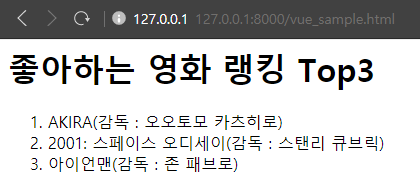

In [1]:
import logging
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# 로거 설정
logger = logging.getLogger(__name__)
formatter = logging.Formatter(
    '[%(levelname)s] %(asctime)s %(name)s %(filename)s:%(lineno)d %(message)s'
)
handler = logging.StreamHandler()
handler.setFormatter(formatter)
logger.setLevel(logging.DEBUG)
logger.addHandler(handler)

# 크롬드라이버 실행 옵션 설정
chrome_options = Options()
chrome_options.add_argument("--headless") # 헤드리스 모드(크롬 실행 X)
chrome_drive_path = 'data/chromedriver.exe'

if __name__ == "__main__":
    try:
        # 크롬을 헤드리스 모드로 실행
        driver = webdriver.Chrome(chrome_drive_path, options=chrome_options)
        
        # 스크레이핑 대상 URL 지정
        target_url = 'http://127.0.0.1:8000/vue_sample.html'
        # 헤드리스 모드 크롬으로 스크레이핑 대상 페이지 열기
        driver.get(target_url)
        
        # 내부적으로 Ajax를 사용해서 처리하는 경우 화면을 모두 읽어 들일 때까지 어느 정도 대기
        time.sleep(2)
        
        # 영화 제목 요소를 css 선택자로 지정해서 추출
        title_elms = driver.find_elements_by_css_selector(".cinema_title") # <span class="cinema_title">영화 제목</span>
        
        # 추출된 요소를 출력
        for i, t in enumerate(title_elms):
            print(i+1, t.text)
            
    except Exception as e:
        # 예외가 발생했을 경우 스택 트레이스를 출력
        logger.exception(e)
    
    finally:
        # 예외가 발생해서 프로그램이 종료되었을 때
        # 크롬 프로세스가 남는 것을 피할 수 있게 finally 구문 내부에서 종료
        driver.close()

1 AKIRA(감독 : 오오토모 카츠히로)
2 2001: 스페이스 오디세이(감독 : 스탠리 큐브릭)
3 아이언맨(감독 : 존 패브로)
